In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:

file_path = r"C:\Users\zeina\OneDrive\Desktop\uniDocts\AutoMPG.csv"

data = pd.read_csv(file_path)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   GallonsPer100Miles        392 non-null    object
 1   GallonsPer100MilesTo1981  362 non-null    object
 2   MPG                       392 non-null    object
 3   Cylinders                 392 non-null    int64 
 4   Displacement100ci         392 non-null    object
 5   Horsepower100             392 non-null    object
 6   Weight1000lb              392 non-null    object
 7   Seconds0to60              392 non-null    object
 8   Year                      392 non-null    int64 
 9   Year70To81                392 non-null    int64 
 10  Origin                    392 non-null    int64 
 11  Origin.Eq.1               392 non-null    int64 
 12  Origin.Eq.2               392 non-null    int64 
 13  Origin.Eq.3               392 non-null    int64 
 14  Name                      

Cleaning the data

In [4]:
# Replace commas with periods in all columns
data = data.replace(',', '.', regex=True)

# Convert numeric columns to appropriate types (where possible)
numeric_columns = ['GallonsPer100Miles', 'GallonsPer100MilesTo1981', 'MPG',
                   'Cylinders', 'Displacement100ci', 'Horsepower100', 'Weight1000lb', 
                   'Seconds0to60', 'Year', 'Year70To81', 'Origin']

for column in numeric_columns:
    data[column] = pd.to_numeric(data[column], errors='coerce')

In [5]:
# Check for missing values after type conversion
missing_values = data.isnull().sum()

In [6]:
# Display updated dataset information and missing values summary
data_info = data.info()
missing_values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   GallonsPer100Miles        392 non-null    float64
 1   GallonsPer100MilesTo1981  362 non-null    float64
 2   MPG                       392 non-null    float64
 3   Cylinders                 392 non-null    int64  
 4   Displacement100ci         392 non-null    float64
 5   Horsepower100             392 non-null    float64
 6   Weight1000lb              392 non-null    float64
 7   Seconds0to60              392 non-null    float64
 8   Year                      392 non-null    int64  
 9   Year70To81                392 non-null    int64  
 10  Origin                    392 non-null    int64  
 11  Origin.Eq.1               392 non-null    int64  
 12  Origin.Eq.2               392 non-null    int64  
 13  Origin.Eq.3               392 non-null    int64  
 14  Name      

GallonsPer100Miles           0
GallonsPer100MilesTo1981    30
MPG                          0
Cylinders                    0
Displacement100ci            0
Horsepower100                0
Weight1000lb                 0
Seconds0to60                 0
Year                         0
Year70To81                   0
Origin                       0
Origin.Eq.1                  0
Origin.Eq.2                  0
Origin.Eq.3                  0
Name                         0
dtype: int64

Observations:

GallonsPer100MilesTo1981 has 30 missing values.

All other columns are complete with no missing values.

In [7]:
# Step 1: Handle Missing Values
# Impute missing values in 'GallonsPer100MilesTo1981' with the column mean
data['GallonsPer100MilesTo1981'].fillna(data['GallonsPer100MilesTo1981'].mean(), inplace=True)

In [8]:
# Step 2: Drop Irrelevant Columns
# Dropping 'Name' as it's not likely useful for ML
data_cleaned = data.drop(columns=['Name'])

In [9]:
# Step 3: Confirm changes and display the cleaned data's summary
cleaned_data_info = data_cleaned.info()
missing_values_after = data_cleaned.isnull().sum()

cleaned_data_info, missing_values_after, data_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   GallonsPer100Miles        392 non-null    float64
 1   GallonsPer100MilesTo1981  392 non-null    float64
 2   MPG                       392 non-null    float64
 3   Cylinders                 392 non-null    int64  
 4   Displacement100ci         392 non-null    float64
 5   Horsepower100             392 non-null    float64
 6   Weight1000lb              392 non-null    float64
 7   Seconds0to60              392 non-null    float64
 8   Year                      392 non-null    int64  
 9   Year70To81                392 non-null    int64  
 10  Origin                    392 non-null    int64  
 11  Origin.Eq.1               392 non-null    int64  
 12  Origin.Eq.2               392 non-null    int64  
 13  Origin.Eq.3               392 non-null    int64  
dtypes: float64

(None,
 GallonsPer100Miles          0
 GallonsPer100MilesTo1981    0
 MPG                         0
 Cylinders                   0
 Displacement100ci           0
 Horsepower100               0
 Weight1000lb                0
 Seconds0to60                0
 Year                        0
 Year70To81                  0
 Origin                      0
 Origin.Eq.1                 0
 Origin.Eq.2                 0
 Origin.Eq.3                 0
 dtype: int64,
    GallonsPer100Miles  GallonsPer100MilesTo1981   MPG  Cylinders  \
 0                 5.6                       5.6  18.0          8   
 1                 6.7                       6.7  15.0          8   
 2                 5.6                       5.6  18.0          8   
 3                 6.3                       6.3  16.0          8   
 4                 5.9                       5.9  17.0          8   
 
    Displacement100ci  Horsepower100  Weight1000lb  Seconds0to60  Year  \
 0               3.07           1.30         3.504    

Missing Values Imputed:

The column GallonsPer100MilesTo1981 had missing values, which were replaced with the column mean.
Irrelevant Column Removed:

The Name column was dropped.

Cleaned Dataset:

Contains 392 rows and 14 columns, with no missing values.

In [10]:
# 1. Descriptive Statistics
print("Descriptive Statistics:")
print(data.describe())

Descriptive Statistics:
       GallonsPer100Miles  GallonsPer100MilesTo1981         MPG   Cylinders  \
count          392.000000                392.000000  392.000000  392.000000   
mean             4.784694                  4.916022   23.445918    5.471939   
std              1.668643                  1.598070    7.805007    1.705783   
min              2.100000                  2.100000    9.000000    3.000000   
25%              3.400000                  3.700000   17.000000    4.000000   
50%              4.350000                  4.900000   22.750000    4.000000   
75%              5.900000                  5.900000   29.000000    8.000000   
max             11.100000                 11.100000   46.600000    8.000000   

       Displacement100ci  Horsepower100  Weight1000lb  Seconds0to60  \
count          392.00000     392.000000    392.000000    392.000000   
mean             1.94412       1.044694      2.977584     15.541327   
std              1.04644       0.384912      0.8494

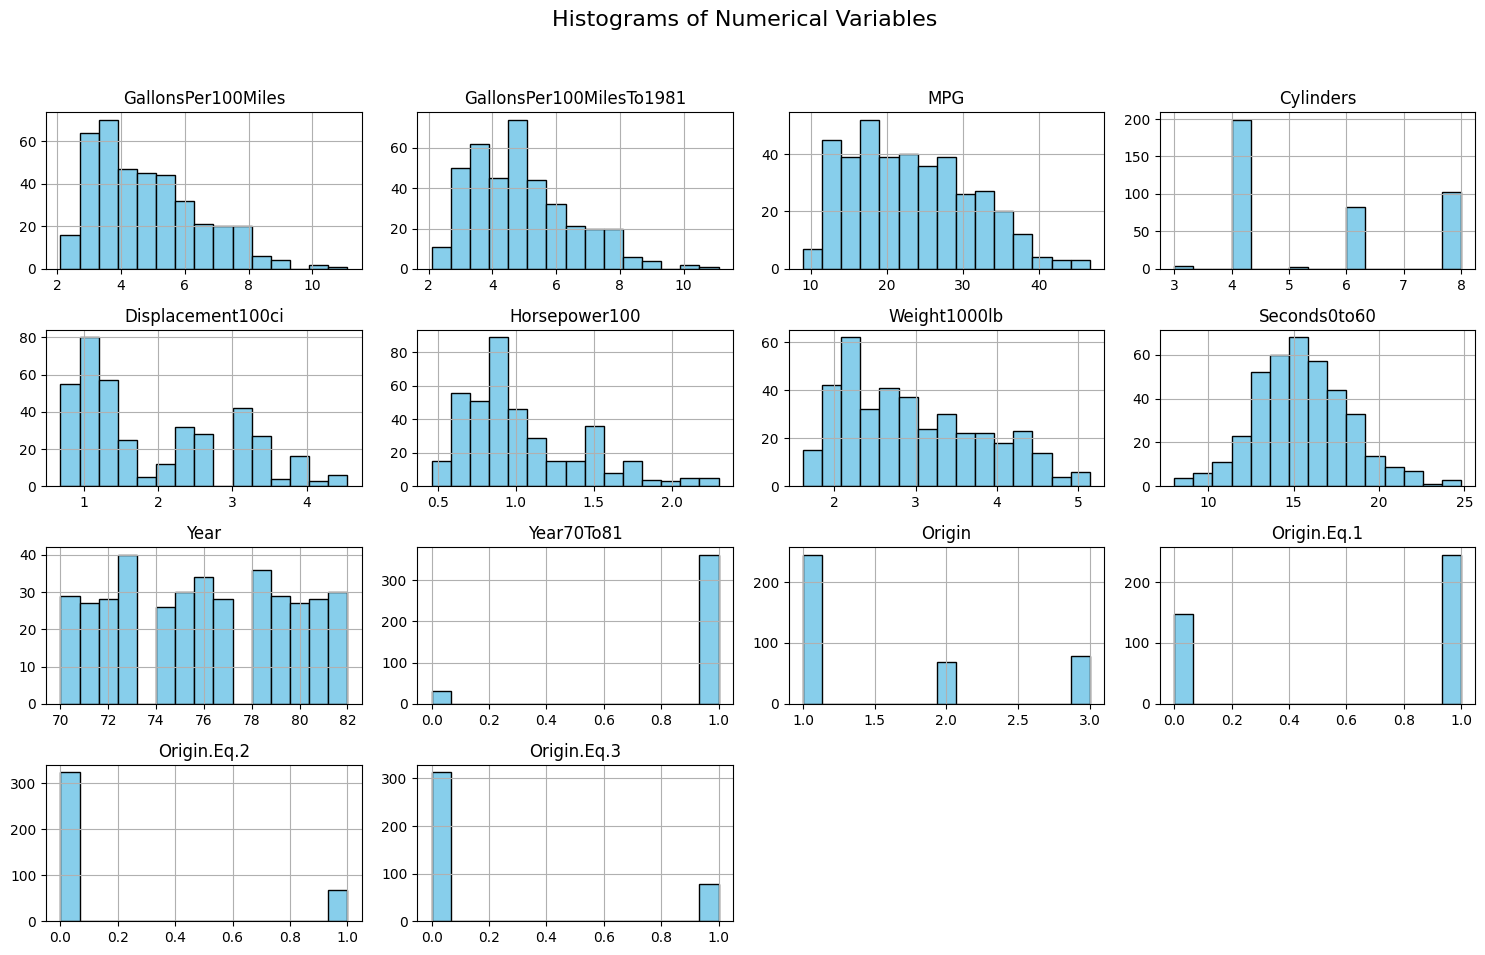

In [11]:
# 2. Visualize Data (Histograms and Scatterplots)
data.hist(bins=15, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numerical Variables", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

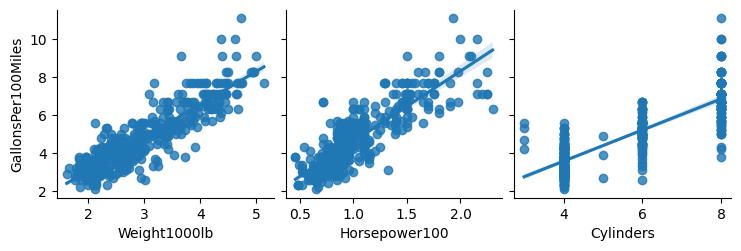

In [12]:
# Scatterplots of GallonsPer100Miles vs other variables
sns.pairplot(data, x_vars=['Weight1000lb', 'Horsepower100', 'Cylinders'], y_vars='GallonsPer100Miles', kind='reg')
plt.show()

In [13]:
# 3. Prepare Data for Regression
# Dependent variable
y = data['GallonsPer100Miles']

# Independent variables
X = data[['Weight1000lb', 'Horsepower100', 'Cylinders']]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Step 4: Feature selection
# Exclude 'GallonsPer100MilesTo1981' due to data leakage
#X = data[['Weight1000lb', 'Displacement100ci', 'Horsepower100']]
#y = data['GallonsPer100Miles']

# Step 5: Train-Test split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# 4. Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
# 5. Evaluate the Model
# Predictions on the test set
from sklearn.metrics import mean_absolute_error


y_pred = model.predict(X_test)

# R^2 Score, Mean Squared Error, and Mean Absolute Error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [16]:
print("R^2 Score:", r2)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

R^2 Score: 0.8401735813505093
Mean Squared Error: 0.41234191647404844
Mean Absolute Error: 0.5058057585215954


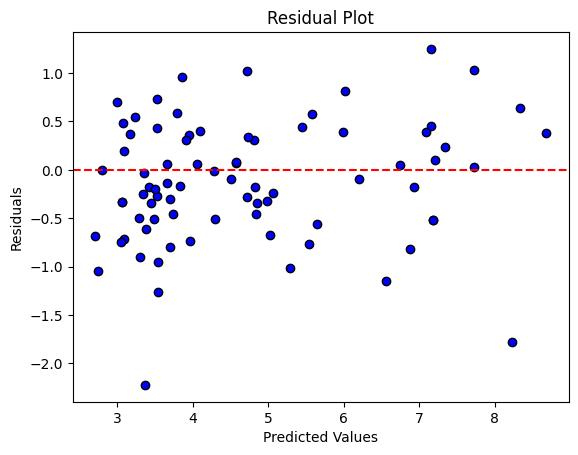

In [17]:
# 6. Residual Plot
plt.scatter(y_pred, y_pred - y_test, color='blue', edgecolor='k')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [18]:
# Step 9: Test with interpolation and extrapolation
# Interpolated values (within range)
interpolated_values = pd.DataFrame({
    'Weight1000lb': [3.2, 3.5, 3.8],
    'Horsepower100': [2.8, 3.0, 3.2],
    'Cylinders': [1.5, 1.6, 1.7]
})

interpolated_predictions = model.predict(interpolated_values)


In [19]:
# Extrapolated values (outside range)
extrapolated_values = pd.DataFrame({
    'Weight1000lb': [5.0, 5.5, 6.0],
    'Horsepower100': [4.5, 5.0, 5.5],
    'Cylinders': [2.5, 3.0, 3.5]
})
extrapolated_predictions = model.predict(extrapolated_values)

In [20]:
# Combine and display test results
test_results = pd.DataFrame({
    'Test Type': ['Interpolation'] * len(interpolated_values) + ['Extrapolation'] * len(extrapolated_values),
    'Weight1000lb': list(interpolated_values['Weight1000lb']) + list(extrapolated_values['Weight1000lb']),
    'Cylinders': list(interpolated_values['Cylinders']) + list(extrapolated_values['Cylinders']),
    'Horsepower100': list(interpolated_values['Horsepower100']) + list(extrapolated_values['Horsepower100']),
    'Predicted GallonsPer100Miles': list(interpolated_predictions) + list(extrapolated_predictions)
})
print("Test Results: Interpolation vs Extrapolation")
print(test_results)

Test Results: Interpolation vs Extrapolation
       Test Type  Weight1000lb  Cylinders  Horsepower100  \
0  Interpolation           3.2        1.5            2.8   
1  Interpolation           3.5        1.6            3.0   
2  Interpolation           3.8        1.7            3.2   
3  Extrapolation           5.0        2.5            4.5   
4  Extrapolation           5.5        3.0            5.0   
5  Extrapolation           6.0        3.5            5.5   

   Predicted GallonsPer100Miles  
0                      6.805540  
1                      7.382427  
2                      7.959314  
3                     11.019974  
4                     12.262534  
5                     13.505094  


In [21]:
# Listing all combinations (order of elements does not matter)
import itertools
print('Combinations:', list(itertools.combinations([1, 2, 3, 4, 5], 3)))

# Calculate the number of combinations
import math
print('Number of combinations:', math.comb(5, 3))

# Listing all permutations (order of elements does matter)
print('Permutations:', list(itertools.permutations([1, 2, 3, 4, 5], 3)))

# Calculate the number of permutations
print('Number of permutations:', math.perm(5, 3))


Combinations: [(1, 2, 3), (1, 2, 4), (1, 2, 5), (1, 3, 4), (1, 3, 5), (1, 4, 5), (2, 3, 4), (2, 3, 5), (2, 4, 5), (3, 4, 5)]
Number of combinations: 10
Permutations: [(1, 2, 3), (1, 2, 4), (1, 2, 5), (1, 3, 2), (1, 3, 4), (1, 3, 5), (1, 4, 2), (1, 4, 3), (1, 4, 5), (1, 5, 2), (1, 5, 3), (1, 5, 4), (2, 1, 3), (2, 1, 4), (2, 1, 5), (2, 3, 1), (2, 3, 4), (2, 3, 5), (2, 4, 1), (2, 4, 3), (2, 4, 5), (2, 5, 1), (2, 5, 3), (2, 5, 4), (3, 1, 2), (3, 1, 4), (3, 1, 5), (3, 2, 1), (3, 2, 4), (3, 2, 5), (3, 4, 1), (3, 4, 2), (3, 4, 5), (3, 5, 1), (3, 5, 2), (3, 5, 4), (4, 1, 2), (4, 1, 3), (4, 1, 5), (4, 2, 1), (4, 2, 3), (4, 2, 5), (4, 3, 1), (4, 3, 2), (4, 3, 5), (4, 5, 1), (4, 5, 2), (4, 5, 3), (5, 1, 2), (5, 1, 3), (5, 1, 4), (5, 2, 1), (5, 2, 3), (5, 2, 4), (5, 3, 1), (5, 3, 2), (5, 3, 4), (5, 4, 1), (5, 4, 2), (5, 4, 3)]
Number of permutations: 60
